In [1]:
import os, sys
import io
import requests
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import skimage as ski

import sys
sys.path.append('..')

# local library of functions to connect to image server
import calcimetry.use_server as server

# A notebook to look at an image

In [2]:
img_path = server.init()  # initiate the global (privatevariables for the database

server : http://imgserver.10.68.0.250.nip.io/data/andra


Status Code 200
nombre de fichiers disponibles 2268
/data/andra/calci_photos/REP2104/Photos/GTR2004-12_0017_REP2104_0065_0161.jpg
/data/andra/calci_photos/REP2104/Photos/GTR2004-12_0017_REP2104_0210_0305.jpg
/data/andra/calci_photos/REP2104/Photos/GTR2004-12_0017_REP2104_2020_2107.jpg
/data/andra/calci_photos/REP2104/Photos/GTR2004-12_0017_REP2104_0530_0626.jpg
/data/andra/calci_photos/REP2104/Photos/GTR2004-12_0017_REP2104_1495_1590.jpg
/data/andra/calci_photos/REP2104/Photos/GTR2004-12_0017_REP2104_0448_0546.jpg
/data/andra/calci_photos/REP2104/Photos/GTR2004-12_0017_REP2104_2191_2287.jpg
/data/andra/calci_photos/REP2104/Photos/GTR2004-12_0017_REP2104_0620_0715.jpg
/data/andra/calci_photos/REP2104/Photos/GTR2004-12_0017_REP2104_1230_1329.jpg
/data/andra/calci_photos/REP2104/Photos/GTR2004-12_0017_REP2104_1316_1416.jpg
Status Code 200
image /data/andra/calci_photos/SUG1107/Photos/GTR2005-08_0044_SUG1107_0173_0272.jpg(1677) de taille (2048, 460)


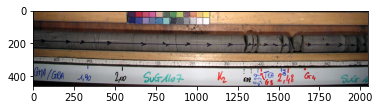

In [3]:
files = server.get_list(img_path)
print("nombre de fichiers disponibles", len(files))
for i in range(10):
    print(files[i])

idx = int(random.random()*len(files))

img = server.get_file(files[idx])
print(f"image {files[idx]}({idx}) de taille {img.size}")
import matplotlib.pyplot as plt
plt.imshow(img)
plt.show()

Convert image to numpy array to have a look at it

In [4]:
image = np.array(img)

Plot the red, green, and blue channels to see if the core is easily recognised

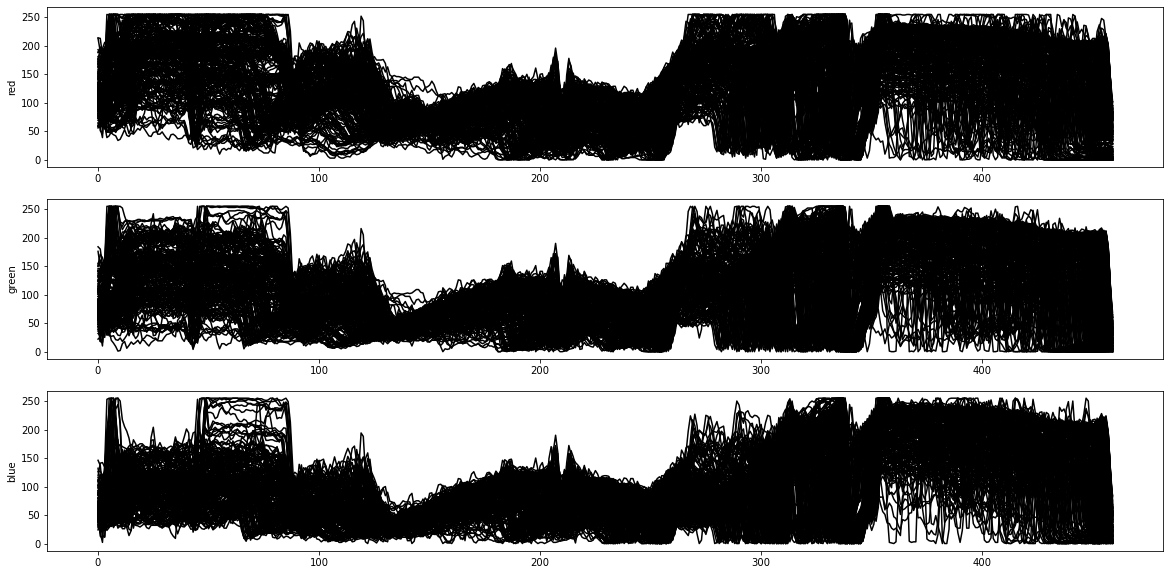

In [5]:
colors = ('red', 'green', 'blue')
channel_ids = [0, 1, 2]

plt.figure(figsize=[20,10])
for row in range(0, np.shape(image)[1], 10):
    for channel_id in channel_ids:
        plt.subplot(3, 1, channel_id + 1)
        plt.plot(image[:, row, channel_id], 'k')
for channel_id in channel_ids:
    plt.subplot(3, 1, channel_id + 1)
    plt.ylabel(colors[channel_id])
plt.show()

Status Code 200
image /data/andra/Photos OHZ1302/GTR2010-01_0002_OHZ1302_1259_1370.jpg(2195) de taille (3240, 651)


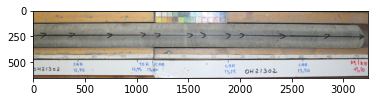

In [ ]:
idx = int(random.random()*len(files))

img = server.get_file(files[idx])
print(f"image {files[idx]}({idx}) de taille {img.size}")
import matplotlib.pyplot as plt
plt.imshow(img)
plt.show()

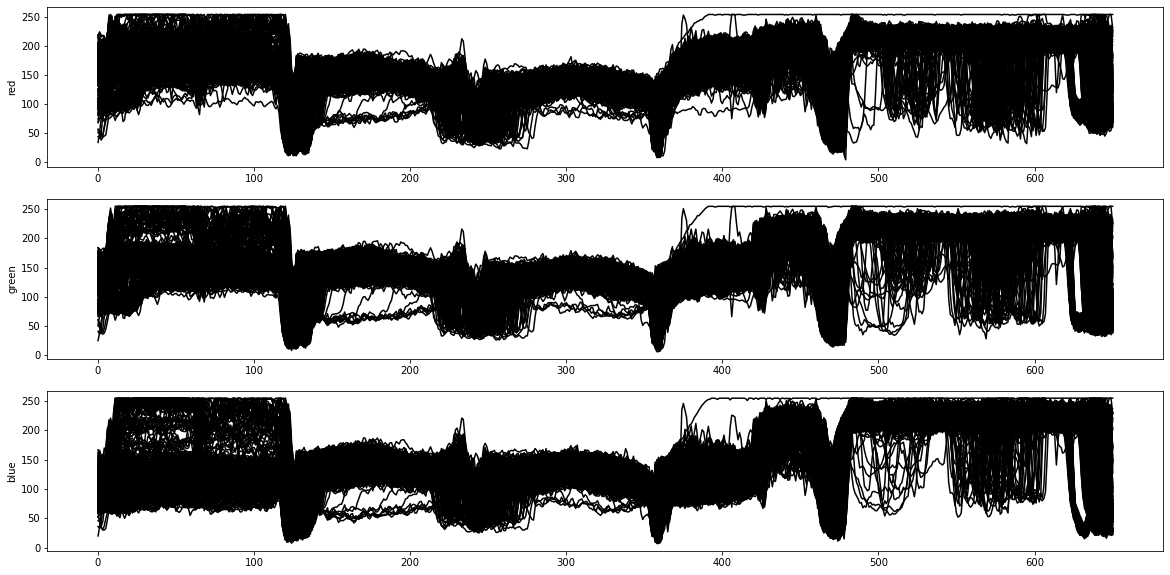

In [ ]:
image = np.array(img)

plt.figure(figsize=[20,10])
for row in range(0, np.shape(image)[1], 10):
    for channel_id in channel_ids:
        plt.subplot(3, 1, channel_id + 1)
        plt.plot(image[:, row, channel_id], 'k')
for channel_id in channel_ids:
    plt.subplot(3, 1, channel_id + 1)
    plt.ylabel(colors[channel_id])
plt.show()

## Get a list of the directories of photos

In [ ]:
files = server.get_list(img_path)
print("nombre de fichiers disponibles", len(files))
dirnames = []
for i in range(len(files)):
    dirnames.append(files[i].split('/')[4])
                                 
listdir = set(dirnames)
print(listdir)
                                
    

Status Code 200
nombre de fichiers disponibles 2268
{'GTR2010-01_0002_OHZ1302_2500_2600.jpg', 'FUG2020-07_0009-OHZ7000_2840_2938.jpg', 'FUG2020-06_0009-OHZ7120_0000_0106.jpg', 'FUG2020-07_0009-OHZ7000_2997_3117.jpg', 'FUG2020-07_0009-OHZ7000_3649_3736.jpg', 'GTR2010-01_0002_OHZ1302_1259_1370.jpg', 'FUG2020-06_0009-OHZ6320_0875_0975.jpg', 'FUG2020-06_0009-OHZ7120_0774_0864.jpg', 'SDZ1288', 'FUG2020-06_0009-OHZ6320_0000_0104.jpg', 'MAG3002', 'FUG2020-06_0009-OHZ6320_0947_1067.jpg', 'GTR2010-01_0002_OHZ1304_2380_2500.jpg', 'KEY1002', 'FUG2020-06_0009-OHZ7120_2900_3022.jpg', 'FUG2020-07_0009-OHZ7000_1488_1610.jpg', 'FUG2020-06_0009-OHZ7120_1948_2024.jpg', 'PAC2003', 'GTR2010-01_0002_OHZ1302_1875_1970.jpg', 'FOR1001', 'GTR2010-01_0002_OHZ1302_2823_2910.jpg', 'FUG2020-06_0009-OHZ7120_1112_1235.jpg', 'GTR2010-01_0002_OHZ1302_0260_0320.jpg', 'DPC3015', 'GTR2010-01_0002_OHZ1304_2910_3030.jpg', 'OHZ1302', 'FUG2020-06_0009-OHZ7120_3404_3525.jpg', 'FUG2020-07_0009-OHZ7000_0345_0443.jpg', 'GTR2010-

In [ ]:
files = server.get_list(img_path)
print("nombre de fichiers disponibles", len(files))
dirnames = []
for i in range(len(files)):
    dirnames.append(files[i].split('/')[3])
                                 
listdir = set(dirnames)
print(listdir)

Status Code 200
nombre de fichiers disponibles 2268
{'Photos', 'Photos OHZ1302', 'Photos OHZ1304', 'calci_photos'}


## Lire une image avec la base de données Mongo

Status Code 200


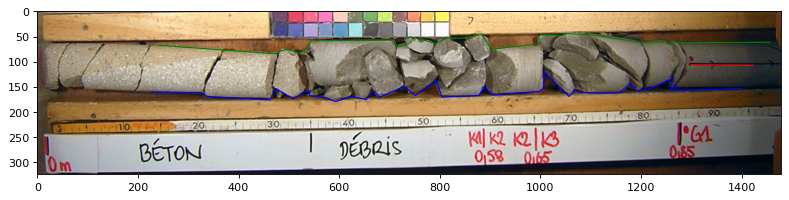

In [25]:
from calcimetry.mongo_api import MongoInfo, MongoAPI
from matplotlib.path import Path
from matplotlib import patches
from matplotlib.pyplot import figure

mongo_info = MongoInfo()

def draw_line(polyline, color='red'):
    x = []
    y = []
    for t in polyline:
        x.append(t[0])
        y.append(t[1])
    apath = Path(list(zip(x, y)))
    apatch = patches.PathPatch(apath, linewidth=1, facecolor='none', edgecolor=color)
    return apatch


drill_name = 'REP2303'
with MongoAPI(mongo_info=mongo_info) as mongo_api:
    doc = mongo_api.db['images'].find_one({'DrillName': drill_name })

    if len(doc['k_Up']) > 1:
        top_line = draw_line(doc['k_Up'], color='green')
    if doc['k_Arrow'] is not None:
        arrow_line = draw_line(doc['k_Arrow'], color='red')
    if len(doc['k_Down']) > 1:
        bottom_line = draw_line(doc['k_Down'], color='blue')

    filename = f"/data/andra/calci_photos/{drill_name}/Photos/{doc['FileName']}"
    img = server.get_file(filename)

    figure(figsize=(12, 8), dpi=80)
    plt.imshow(img)
    if len(doc['k_Up']) > 1:
        plt.gca().add_patch(top_line)
    if doc['k_Arrow'] is not None:
        plt.gca().add_patch(arrow_line)
    if len(doc['k_Down']) > 1:
        plt.gca().add_patch(bottom_line)


        


In [15]:
drill_name = 'OHZ2009'
with MongoAPI(mongo_info=mongo_info) as mongo_api:
    doc = mongo_api.db['images'].find_one({'DrillName': drill_name })
    print(doc['k_Up'])

{{51;119};{435;117};{600;113};{900;103};{917;121};{947;104};{1025;125};{1040;166};{1053;121};{1770;122};{2350;123};{2952;128}}


In [17]:
drill_name = 'BPE4023'
with MongoAPI(mongo_info=mongo_info) as mongo_api:
    doc = mongo_api.db['images'].find_one({'DrillName': drill_name })
    print(doc['k_Up'])

[[55, 173], [259, 179], [430, 177], [583, 171], [723, 184], [1113, 178], [1432, 187], [1562, 190], [1634, 193], [1930, 194], [2599, 202], [3210, 211]]
